# Basic Morphological Operators
***
Feel free to skip over the sections where the work is done manually and look over the opencv syntax. The manual code is mainly there to help explain the math and work behind the opencv methods.

In [1]:
# notebook imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(334, 420)
[[255 255 255]
 [255 255 255]
 [255 255 255]]


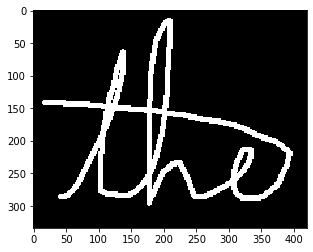

In [36]:
# Dilation
# maybe should start with simple binary dilation
kernel = np.full((3,3), 255, dtype='uint8')
writing = cv2.imread('../Image_Data/cursive.png', 0)
ret, binary_writing = cv2.threshold(writing, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)
print(binary_writing.shape)
print(kernel)
plt.imshow(binary_writing, cmap='gray')

In [87]:
# expects a binary image of 2 dimensions (grayscale) and a kernel
def dilate(img, kernel):
    padding = (int)(len(kernel)/2)
    padded_img = np.zeros((len(img) + 1*2, len(img[0]) + 1*2), dtype='uint8')
    padded_img[padding:len(img) + 1, padding:len(img[0]) + 1] = img
#     dilated_img = np.zeros((len(img) + 1*2, len(img[0]) + 1*2), dtype='uint8')
#     dilated_img[padding:len(img) + 1, padding:len(img[0]) + 1] = img
    dilated_img = img.copy()
    for row in range(padding, len(img) - 1):
        for col in range(padding, len(img[row]) - 1):
            if padded_img[row, col] == 255:
                dilated_img[row-padding:row+padding+1, col-padding:col+padding+1] = kernel
    return dilated_img

In [88]:
dilated_writing = dilate(binary_writing, kernel)

In [89]:
# opencv syntax for binary dilation
dilated_writing_cv = cv2.dilate(binary_writing, np.ones((3, 3), dtype='uint8'), iterations=1)

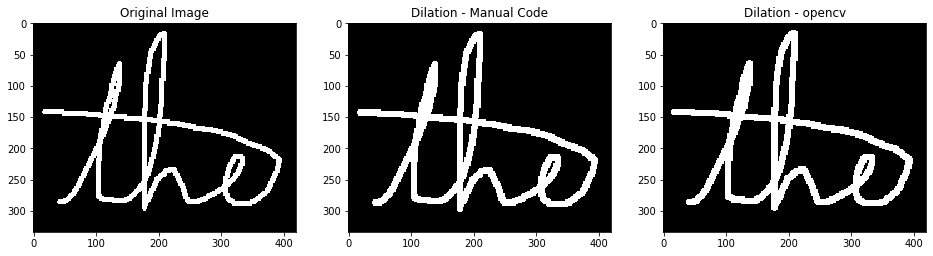

In [107]:
fig, axarr = plt.subplots(1, 3, figsize=(16, 16))
axarr[0].set_title('Original Image')
axarr[0].imshow(binary_writing, cmap='gray')
axarr[1].set_title('Dilation - Manual Code')
axarr[1].imshow(dilated_writing, cmap='gray')
axarr[2].set_title('Dilation - opencv')
axarr[2].imshow(dilated_writing_cv, cmap='gray')

***
### Binary Erosion

In [83]:
# expects binary image 
# Sorry, this algorithm is kinda slow
def erode(img, kernel):
    padding = (int)(len(kernel)/2)
    kernel_sum = np.sum(kernel) # might need to change this for other filters like cross filter
    padded_img = np.zeros((len(img) + 1*2, len(img[0]) + 1*2), dtype='uint8')
    padded_img[padding:len(img) + 1, padding:len(img[0]) + 1] = img
    eroded_img = img.copy()
    for row in range(padding,len(img) - 1):
        for col in range(padding, len(img[row]) - 1):
            if np.sum(padded_img[row-padding:row+padding+1, col-padding:col+padding+1]) == kernel_sum:
                eroded_img[row-padding:row+padding+1, col-padding:col+padding+1] = kernel
            else:
                eroded_img[row-padding:row+padding+1, col-padding:col+padding+1] = (kernel * 0)
    return eroded_img

In [92]:
eroded_writing = erode(binary_writing, kernel)

In [93]:
# opencv syntax for binary erosion
eroded_writing_cv = cv2.erode(binary_writing, np.ones((3, 3), dtype='uint8'), iterations=1)

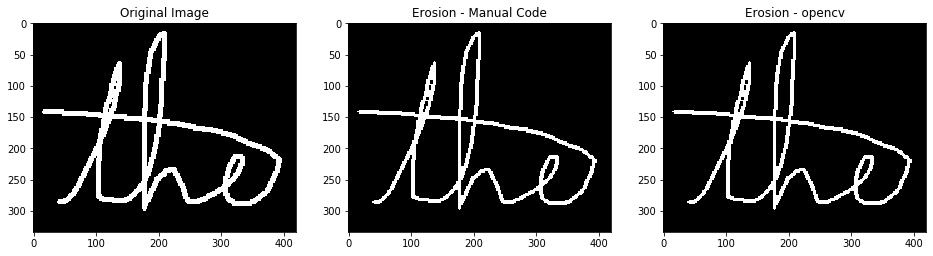

In [106]:
fig, axarr = plt.subplots(1, 3, figsize=(16, 16))
axarr[0].set_title('Original Image')
axarr[0].imshow(binary_writing, cmap='gray')
axarr[1].set_title('Erosion - Manual Code')
axarr[1].imshow(eroded_writing, cmap='gray')
axarr[2].set_title('Erosion - opencv')
axarr[2].imshow(eroded_writing_cv, cmap='gray')

***
### Opening

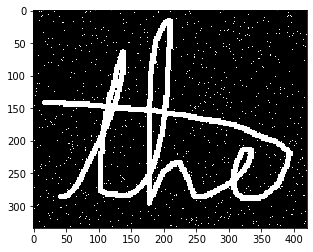

In [111]:
# simply an erosion, then a dilation
# since we already have the eroded image, we can simply pass that in to the dilation method already written
# more useful for removing noise, maybe should add some noise then
import random
noisy_writing = binary_writing.copy()
for i in range(2000):
    rand_x = random.randint(0, len(noisy_writing) - 1)
    rand_y = random.randint(0, len(noisy_writing[0]) - 1)
    noisy_writing[rand_x, rand_y] = 255
plt.imshow(noisy_writing,cmap='gray')

In [112]:
opened_writing = dilate(erode(noisy_writing, kernel), kernel)

In [113]:
# opencv syntax
opened_writing_cv = cv2.morphologyEx(noisy_writing, cv2.MORPH_OPEN, kernel)

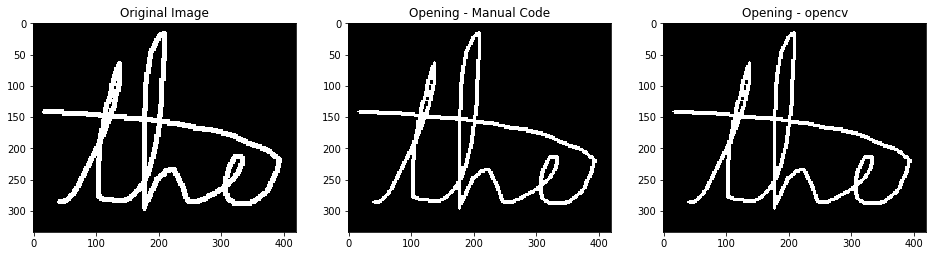

In [114]:
fig, axarr = plt.subplots(1, 3, figsize=(16, 16))
axarr[0].set_title('Original Image')
axarr[0].imshow(binary_writing, cmap='gray')
axarr[1].set_title('Opening - Manual Code')
axarr[1].imshow(eroded_writing, cmap='gray')
axarr[2].set_title('Opening - opencv')
axarr[2].imshow(eroded_writing_cv, cmap='gray')

***
## References
* Information on many morphological operators: https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm
* Python morphological operations docs: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
* dilation and erosion in C++: https://docs.opencv.org/2.4/doc/tutorials/imgproc/erosion_dilatation/erosion_dilatation.html
* Erosion Article: https://en.wikipedia.org/wiki/Erosion_(morphology)
* Dilation Article: https://en.wikipedia.org/wiki/Dilation_(morphology)
* General Morphology: https://en.wikipedia.org/wiki/Mathematical_morphology
***